# 회귀 트리(Regression Tree)
- 회귀 함수를 구하지 않으며 트리 기반으로, 리프 노드에 속한 데이터 값의 평균 값으로 예측 값을 계산
- 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등 모든 트리 기반 알고리즘은 분류뿐만 아니라 회귀도 가능
    - 위 알고리즘들은 CART(Classificaion And Regression Trees)) 알고리즘 기반

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 
import numpy as np 

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[ -7.92604092 -12.98371634 -20.57673437 -46.32548217 -18.81964548]
[2.81532253 3.60329243 4.53615855 6.80628255 4.33816153]
4.419843517597128


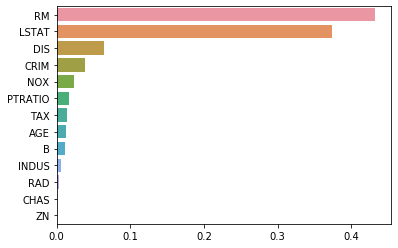

In [5]:
import seaborn as sns 

rf.fit(X_data, y_target)
feature = pd.Series(data=rf.feature_importances_, index=X_data.columns)
feature = feature.sort_values(ascending=False)
sns.barplot(x=feature, y=feature.index)

(100, 2)


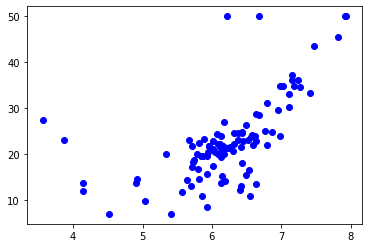

In [6]:
import matplotlib.pyplot as plt 

df_sample = df[['RM', 'PRICE']]
df_sample = df_sample.sample(n=100)
print(df_sample.shape)
plt.figure()
plt.scatter(df_sample.RM, df_sample.PRICE, c='blue')

## 선형 회귀와 회귀 트리의 비교, 회귀 트리의 max_depth 파라미터가 크면 과적합(overfitting) 발생
- Decision Tree 사용

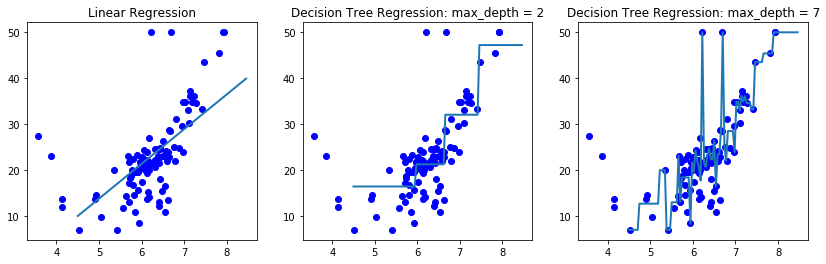

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
dt2 = DecisionTreeRegressor(max_depth=2)
dt7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)
X_feature = df_sample['RM'].values.reshape(-1, 1)
y_target = df_sample['PRICE'].values.reshape(-1, 1)

lr.fit(X_feature, y_target)
dt2.fit(X_feature, y_target)
dt7.fit(X_feature, y_target)

pred_lr = lr.predict(X_test)
pred_dt2 = dt2.predict(X_test)
pred_dt7 = dt7.predict(X_test)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(df_sample.RM, df_sample.PRICE, c='blue')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression: max_depth = 2')
ax2.scatter(df_sample.RM, df_sample.PRICE, c='blue')
ax2.plot(X_test, pred_dt2, label='linear', linewidth=2)

ax3.set_title('Decision Tree Regression: max_depth = 7')
ax3.scatter(df_sample.RM, df_sample.PRICE, c='blue')
ax3.plot(X_test, pred_dt7, label='linear', linewidth=2)